### 1.1 Creación de un entorno virtual

In [ ]:
#conda create -n nombre_del_entorno python=3.9

pip install ipykernel
python -m ipykernel install --user --name=yolov7_juan

### 1.2 Activacion del entorno

In [ ]:
#conda activate nombre_del_entorno python

### 1.2 Configuración YOLOV7
#### 1.2.1 Clonar repositorio

In [ ]:
git clone https://github.com/WongKinYiu/yolov7.git

#### 1.2.2 Ajustar Requerimientos
Dentro de yolo-main remplace el archivo requirements.txt por

In [ ]:
# Usage: pip install -r requirements.txt

# Base ----------------------------------------
matplotlib>=3.2.2
numpy>=1.18.5,<1.24.0
opencv-python>=4.1.1
Pillow>=7.1.2
PyYAML>=5.3.1
requests>=2.23.0
scipy>=1.4.1
tqdm>=4.41.0
protobuf<4.21.3

# Logging -------------------------------------
tensorboard>=2.4.1
# wandb

# Plotting ------------------------------------
pandas>=1.1.4
seaborn>=0.11.0

# Export --------------------------------------
# coremltools>=4.1  # CoreML export
# onnx>=1.9.0  # ONNX export
# onnx-simplifier>=0.3.6  # ONNX simplifier
# scikit-learn==0.19.2  # CoreML quantization
# tensorflow>=2.4.1  # TFLite export
# tensorflowjs>=3.9.0  # TF.js export
# openvino-dev  # OpenVINO export

# Extras --------------------------------------
ipython  # interactive notebook
psutil  # system utilization
thop  # FLOPs computation
# albumentations>=1.0.3
# pycocotools>=2.0  # COCO mAP
# roboflow

Asi mismo cree un archivo requirements_gpu.txt con lo siguiente:

In [ ]:
#For Torch GPU

-i https://download.pytorch.org/whl/cu113

torch==1.11.0+cu113 
torchvision==0.12.0+cu113 
torchaudio==0.11.0 



Corra ambos archivos con pip install -r requirements.txt

## 2 Creacion de un DataSet Propio

Dado que se busca hacer un detector personalizado es muy probable que sea necesario tener nuestro propio set de datos para el entrenamiento del modelo, es posible que existan algunos datasets ya etiquetados que otras personas ya hayan etiquetado. Sin embargo para nustro caso particular deseabamos detectar algunos prodcutos de una tienda de conveniencia, al ser algo tan particular no encontramos otro recurso mas que la creación de nuestro dataset.

Esto perse no es algo negativo, de hecho construir el dataset con imagenes que luego procesara el modelo le da un mejor desempeño en esas condciones, sin embargo su desempeño podra variar al variar esas condiciones particulares. 

Cabe mencionar que la creación de un dataset propio implica un trabajo adicional, dado que implica otros procesos. A continuación presentamos algunas maneras de crear estos datasrts propios


### 2.1 Recolección de imagenes

#### 2.1.1 Dataset a partir de Internet
Una posible solución es simplemente descargar las imagenes de internet. Esto nos brindara una gran cantidad de imagenes con gran diversidad

Para hacer esto usaremos simple_image_download.


#pip install simple_image_download==0.4

Luego usaremos el siguiente script

In [ ]:
from simple_image_download import simple_image_download as simp

response =simp.simple_image_download

number_images=100                #Numero de imagenes a decargar palabra clave
keywords = ["hatsu azul 400 ml"] #Prompt o busqueda de google a hacer, puede poner varias palabras clave

for kw in keywords:
    response().download(kw,number_images)

Este script creara una carpeta llamada simple_images, dentro de la carpeta creara una carpeta por cada una de las keywords, una vez genere las carpetas traslade todas las imagenes a otra carpeta, por ejemplo una carpeta llamada data o images

#### 2.1.2 Dataset a partir de captura de video - modo video
Otra posibilidad es crear el dataset a partir de una captura de video, es decir que cada cuadro o algunos de los cuadro del video sean imagenes para el entrenamiento del modelo

Para esto usaremos el siguiente script


In [ ]:
import cv2
import os
import time
import uuid

IMAGES_PATH = os.path.join('data','captured_images') #Declaramos la ruta donde guardaremos las imagenes capturadas
number_images = 30 #Declaramos la cantidad de iamgenes a capturar

cap = cv2.VideoCapture(0) # El numero indica la camara a usar, 1 suele ser una webcam externa mientras0 es la incorporada

time.sleep(1.5)  #tiempo entre imagenes capturadas

for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'): #Se indica que con q se cierra la ventana
        break
cap.release()
cv2.destroyAllWindows()

#### 2.1.3 Dataset a partir de captura de video - modo captura
Otra posibilidad es crear el dataset a partir de una captura de video, es decir que cada cuadro o algunos de los cuadro del video sean imagenes para el entrenamiento del modelo, a diferencia del modo anterior donde se capturan las imagnes seguido, en este modo se selecciona en que momento desea realizar la captura.

Para esto usaremos el siguiente script que captura la imagen al presionar la tecla s, se termina al salir(Preisonar tecla q ) o cuando se capture el numero de imagenes deseado.


In [ ]:
import cv2
import os
import time
import uuid

# Ruta donde se guardarán las fotos
images_path = os.path.join('data','captured_images')



# Función para capturar varias fotos y guardarlas en el directorio especificado
def capture_images():
    # Creamos la ventana donde se mostrará la imagen
    cv2.namedWindow("Captura de imagen", cv2.WINDOW_NORMAL)
    
    # Inicializamos la cámara
    cap = cv2.VideoCapture(1)
    
    # Contador para nombrar las imágenes capturadas
    count = 0
    number_images = 30 #Declaramos la cantidad de iamgenes a capturar
    
    while True:
        # Capturamos una imagen de la cámara
        ret, frame = cap.read()

        new_size = (640, 480)
        frame = cv2.resize(frame, new_size)
        
        # Mostramos la imagen capturada en la ventana
        cv2.imshow("Captura de imagen", frame)
        
        # Esperamos a que se presione una tecla
        key = cv2.waitKey(1)
        
        # Si se presiona la tecla "s", guardamos la imagen actual en el directorio especificado
        if key == ord("s"):
            count += 1
            filename = os.path.join(images_path,f'{str(uuid.uuid1())}.jpg')
            cv2.imwrite(filename, frame)
            print("Imagen guardada como", filename)
        
        # Si se presiona la tecla "q", salimos del bucle
        elif key == ord("q") or count>=number_images:
            break
    
    # Liberamos los recursos de la cámara y cerramos la ventana
    cap.release()
    cv2.destroyAllWindows()

# Llamamos a la función para capturar las fotos
capture_images()


### 2.2 Etiquetado de Imagenes
Una vez recolectadas las imagenes la siguiente etapa es etiquetar las imagenes, esto se refiere a indicar que objetos se encuentran en la imagen y cuales son sus pocisiones.

Para tal fin usaremos el paquete labelImg

In [ ]:
#pip install labelImg

Para ejecutar la herramienta corra en la consola labelImg, deberia desplegarse una ventana como la siguiente:

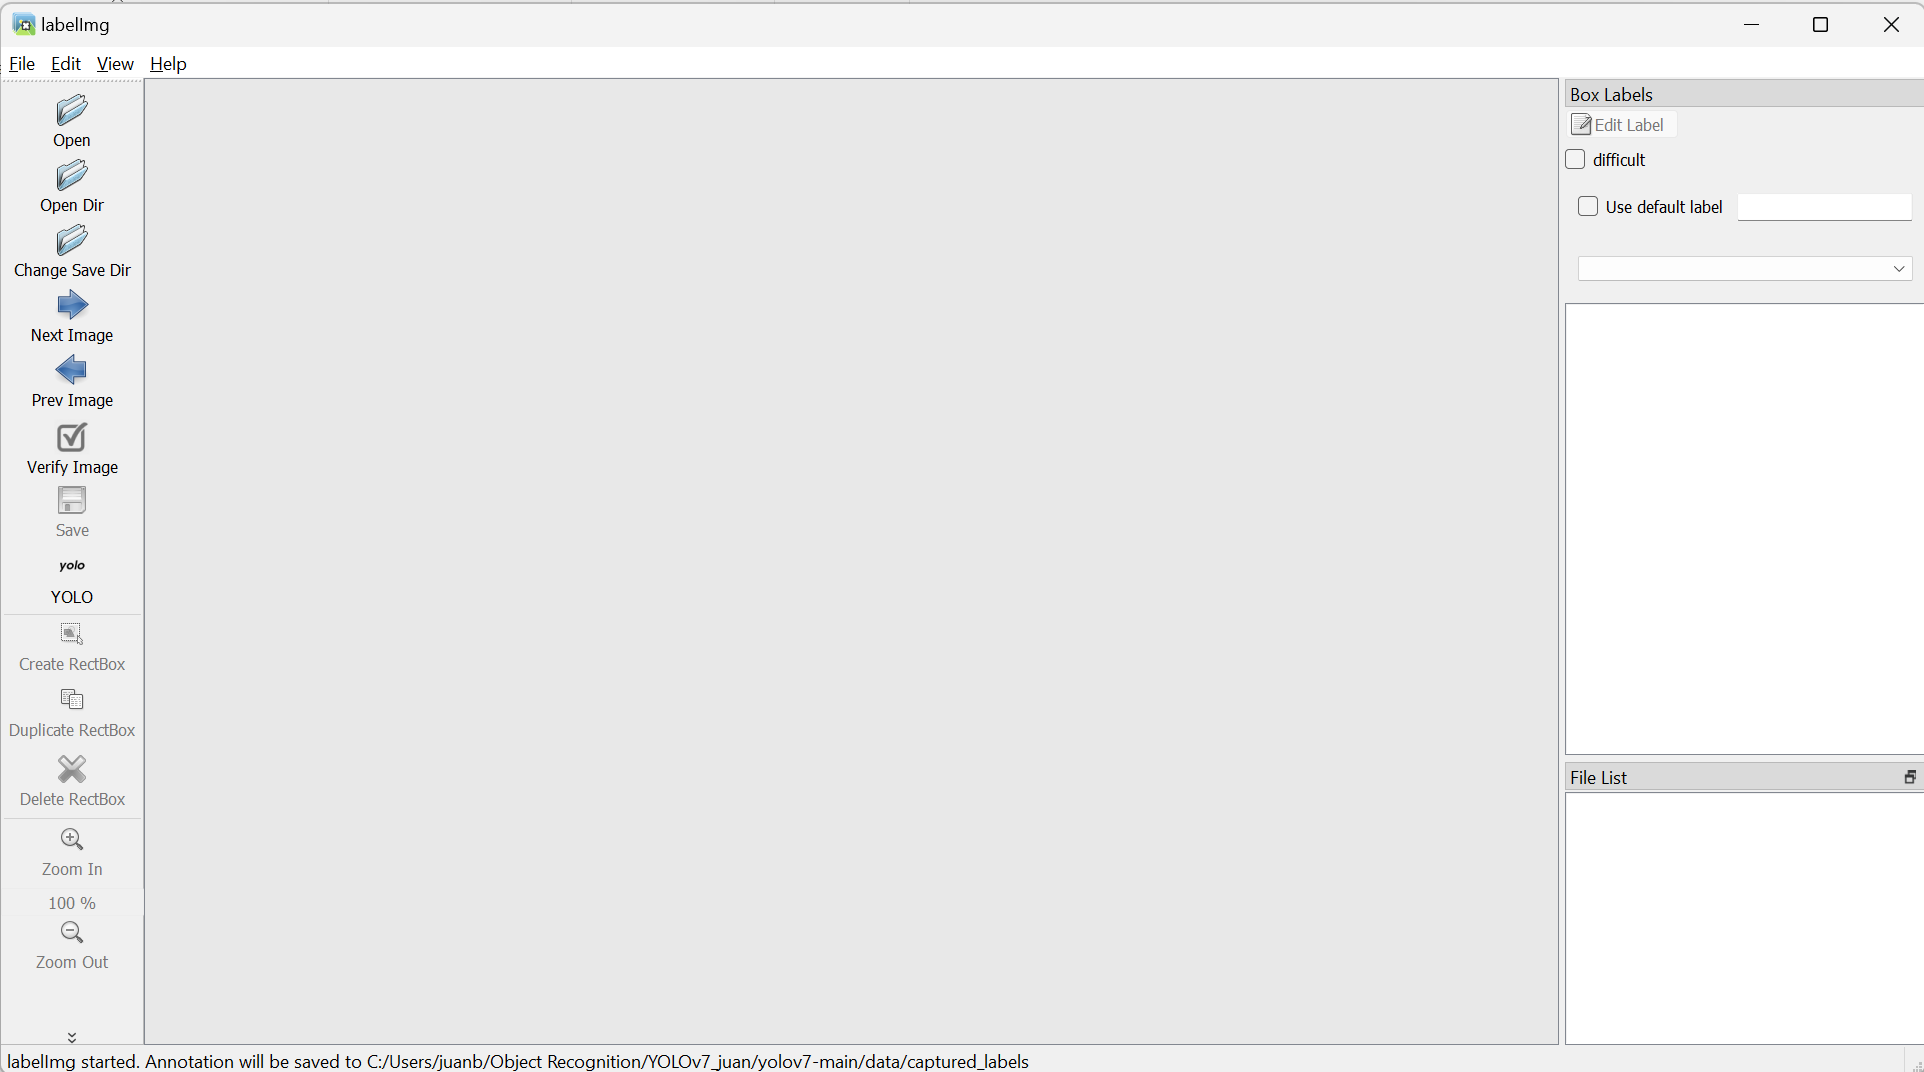

#### 2.2.2 Seleccion de Imagenes
Seleccion el icono "Open Dir" y navege hasta la carpeta donde se encuentren las imagenes (donde guardo las imagenes capturadas)

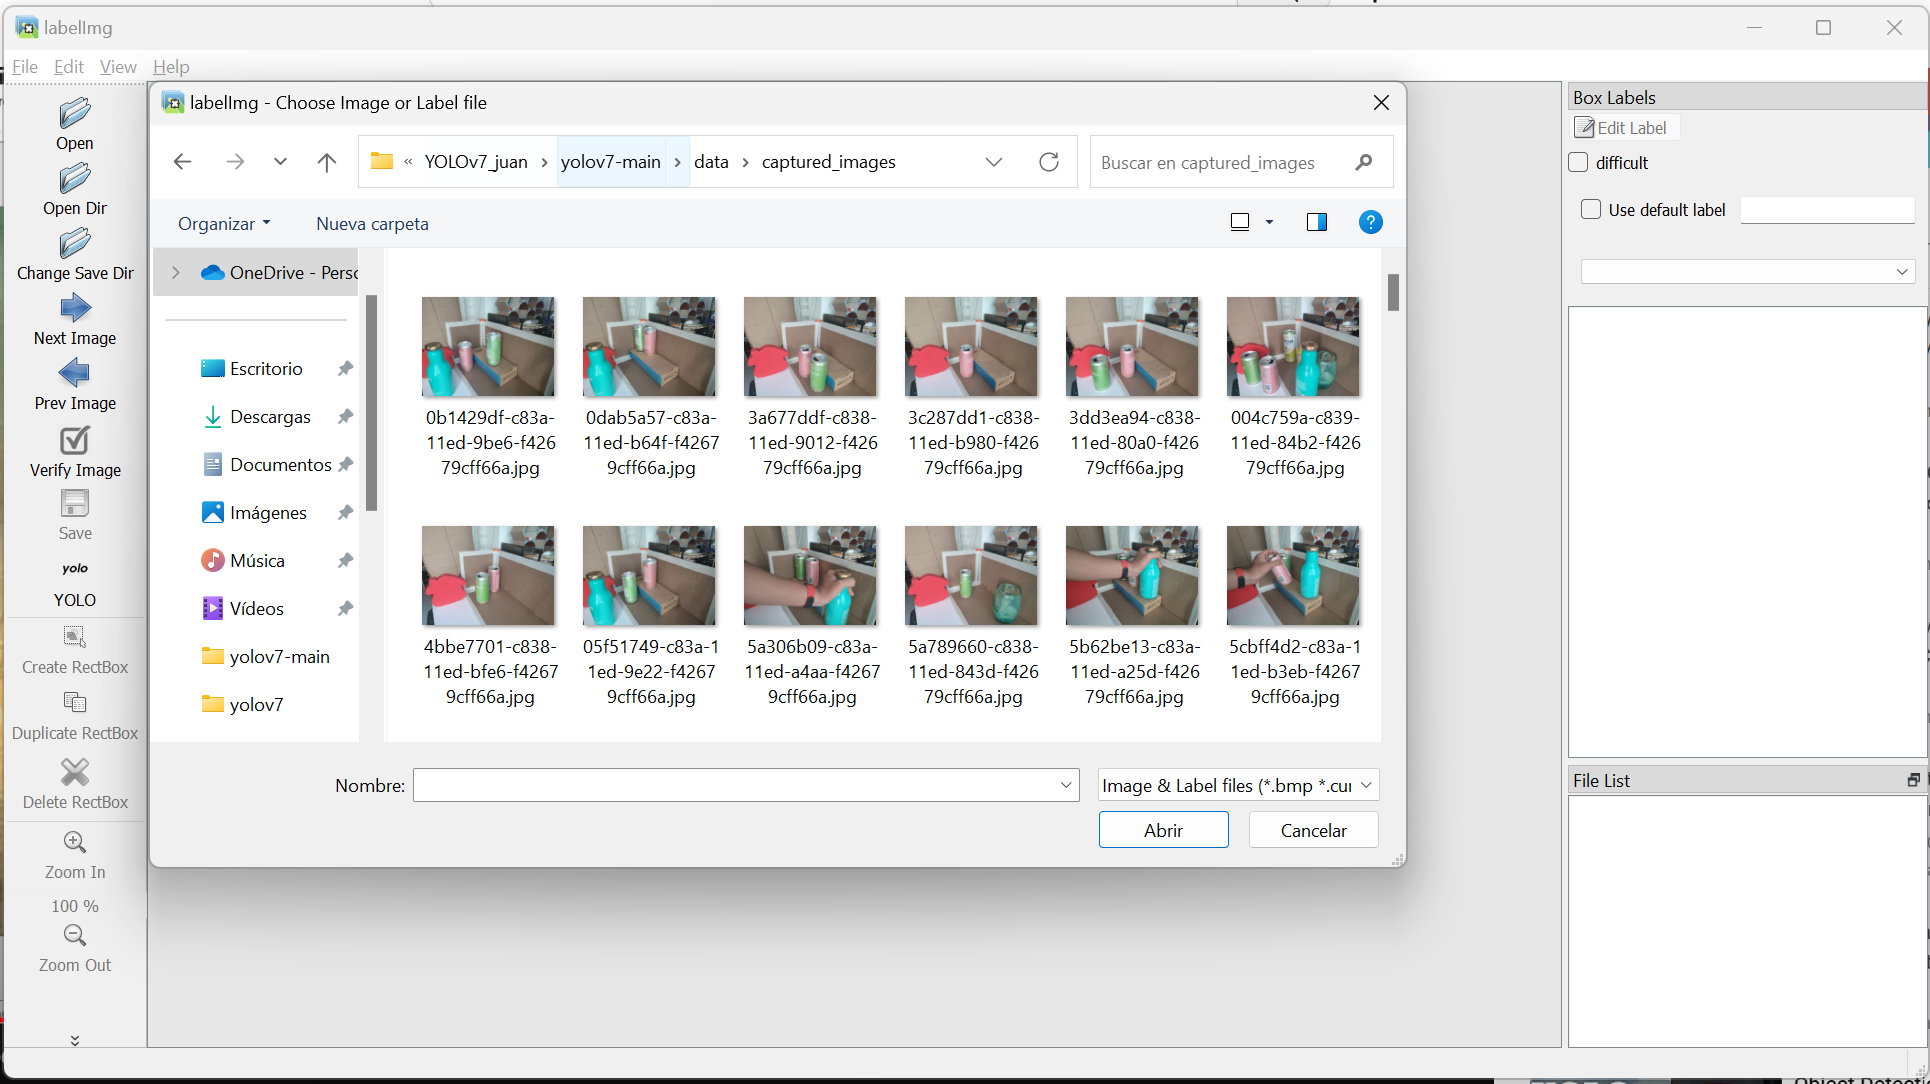

#### 2.2.3 Selección Folder de salida
A continuación cree un folder donde se guarden las etiquetas generadas. Se recomienda crearlo en la misma carpeta donde creo la carpeta con las imagenes capturadas. Luego seleccione "Change Save Dir" y navegue hasta el folder

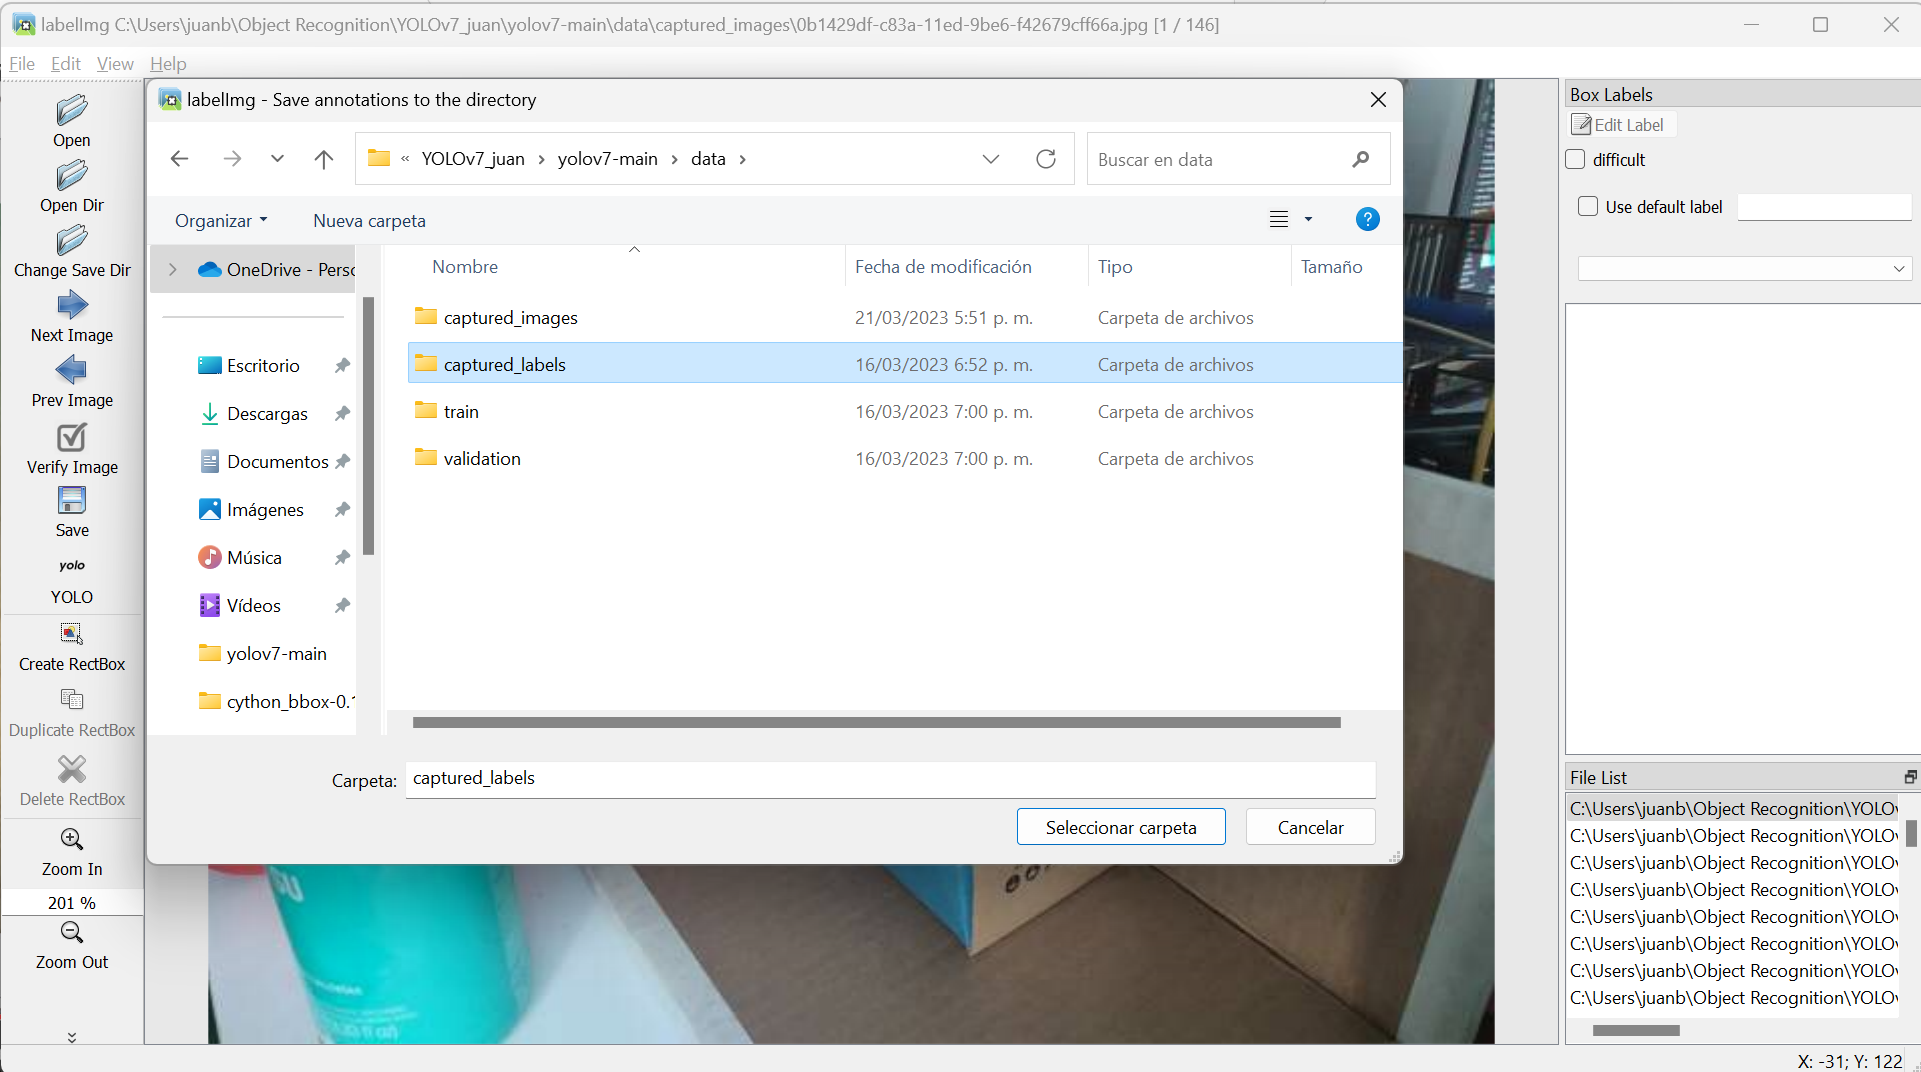

#### 2.2.4 Salvado Automatico
Habilite la opción de salvado automatico en "View/Auto save mode", esto salvara de manera automaticamente las etiquetas realizadas


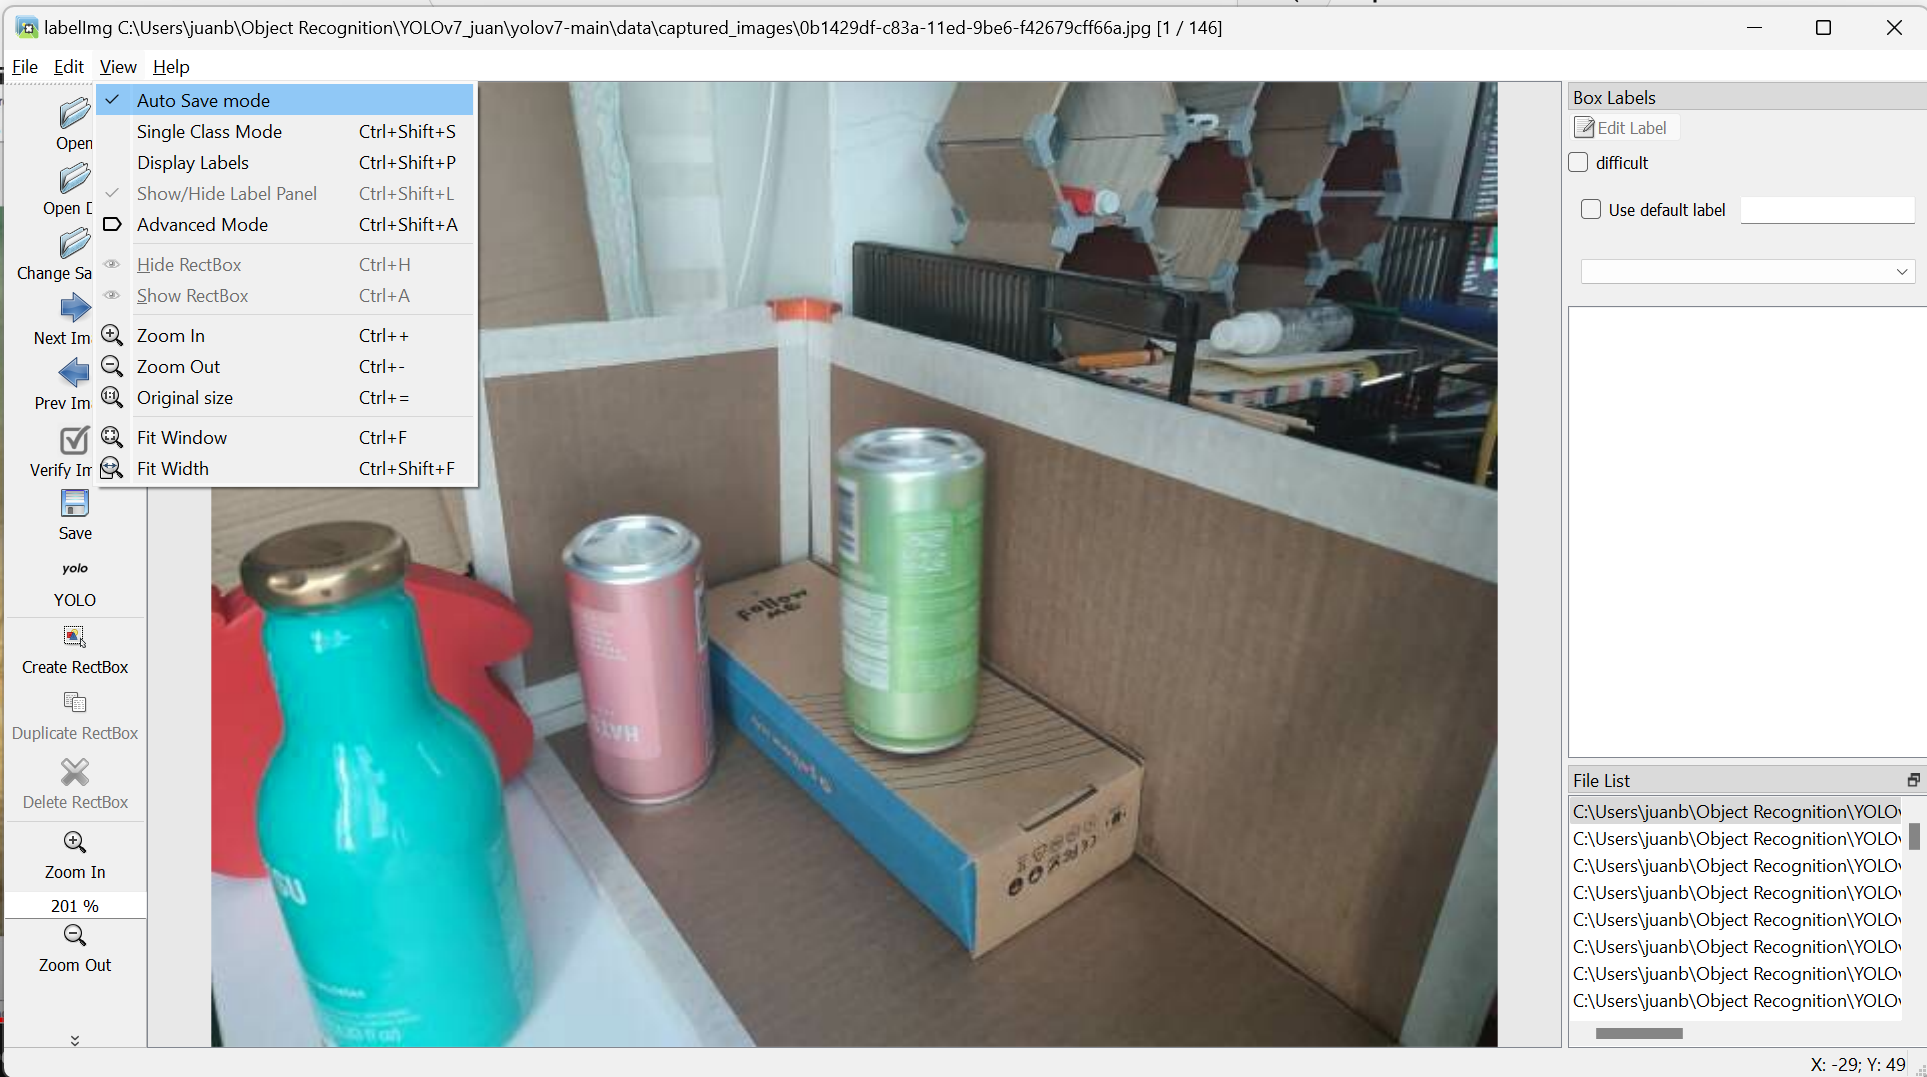

#### 2.2.5 Creación de etiquetas
Para genenerar una etiqueta seleccione "create rectbox"  o presione la tecla "w",
luego escriba el nombre de la clase y seleccione "ok".
Repita este proceso por cada objeto de interes en la imagen.
Para avandar o retroceder presione "a" ó "d" respectivamente, tambien cuenta con las opcines next o prev image
Es muy importante validar que el formato de guardo este en "YOLO" esto esta en el menu derecho abajo de save, solo cliquee hatsa ver yolo


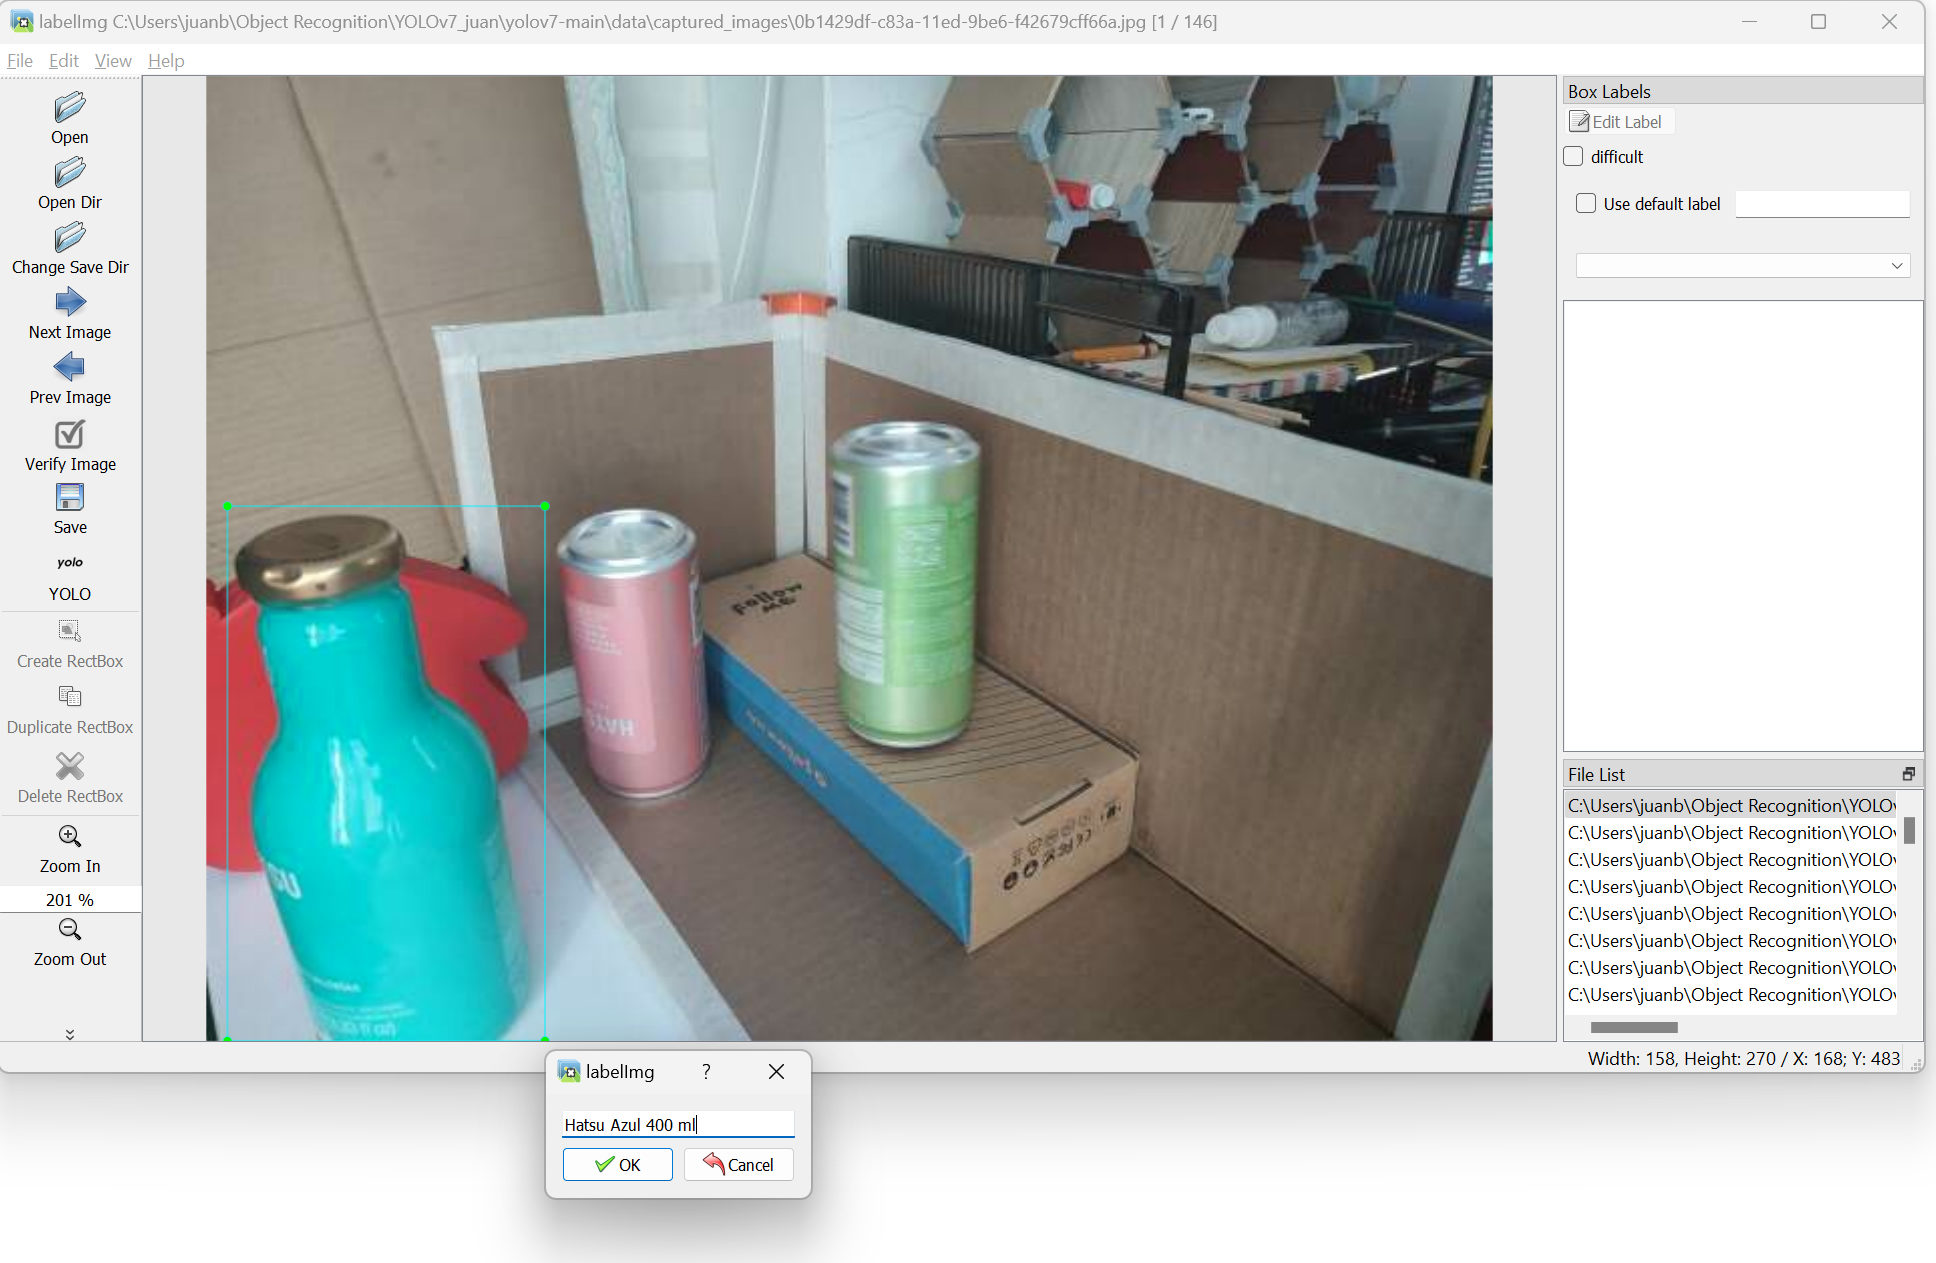

## 3 Entrenamiento del modelo

### 3.1 Configuración de archivos

dentro de yolov7-main/data cree un archivo .yaml, este archivo contendra la ubicación de los directorios de entrenamiento y validación, asi como la catidad y los nombres de las clases.

Use la siguiente estructura 


In [ ]:
train: ./data/train
val: ./data/validation

# number of classes
nc: 3
# class names
names: [ 'Hatsu azul', 'Soda Verde', 'Soda Rosa' ]


En "yolov7-main/cfg/training"cree una copia del archivo "yolov7.yaml" cambiele el nombre segun desee y cambie el numero de clases segun corresponda.

### 3.2 Descarga de pesos
descarge los pesos base de cada modelo, disponibles en: https://github.com/WongKinYiu/yolov7/releases seleccione assets y descarge yolov7.pt o el modelo que desee, traslade estos archivos yolov7-main

### 3.3 Entrenamiento del modelo

Una vez descargados los modelos base use el siguiente comando:

python train.py --workers 1 --device 0 --batch-size 8 --epochs 100 --img 640 640 --data data/hatsu_test3.yaml --hyp data/hyp.scratch.custom.yaml --cfg cfg/training/yolov7-hatsu3.yaml --name yolov7-hatsu3 --weights yolov7.pt

- workers: 1
- device: 1
- batch-size: 8 tamaño de los paquetes de datos, mientras mas alto sea: 2 4 8 16
- epochs: numero de iteraciones a mas mejores resutados pero desde 20 esta bien
- img configura el tamaño de imagen 640 640
- data donde esta la info de nuestro modelo, es uno de los archivos que creamos
- hyp configuración de hiperparametros base
- cfg archivo creado como copia del modelo base
- name lugar donde se guardaran los resultados

al final en runs/train se creara una carpeta con el nombre especificado y se guardara la información del modelo

In [ ]:
python train.py --workers 1 --device 0 --batch-size 8 --epochs 100 --img 640 640 --data data/hatsu_test3.yaml --hyp data/hyp.scratch.custom.yaml --cfg cfg/training/yolov7-hatsu3.yaml --name yolov7-hatsu3 --weights yolov7.pt

Dentro de la carpeta creada encontrara diferentes diagramas, las curvas de aprendizaje y los pesos en las diferentes iteraciones.



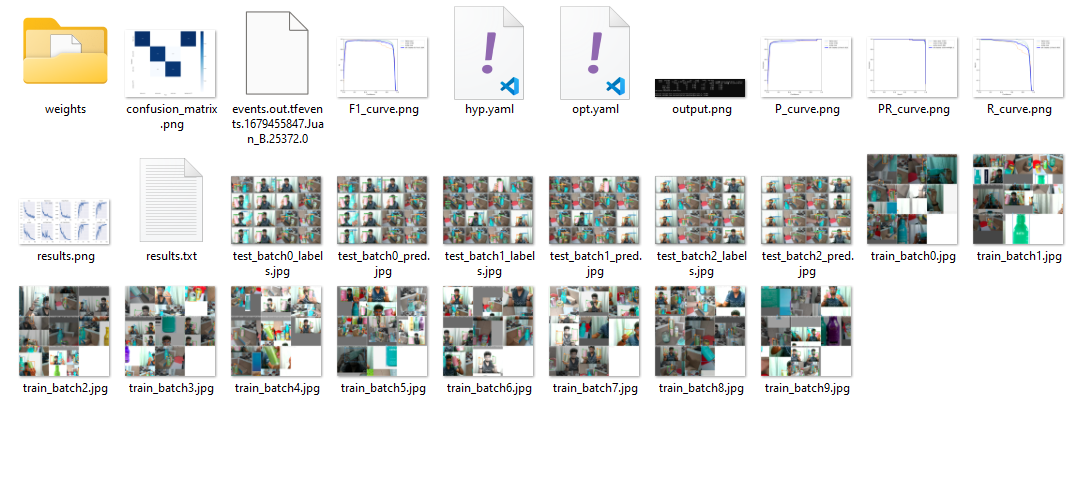

En la carpeta de weights encontrara los pesos de los modelos a lo largo de las iteraciones, seleccione best.pt y copie y lleve esta carpeta a yolov7-main, cambie el nombre de la carpeta segun desee o requiera.


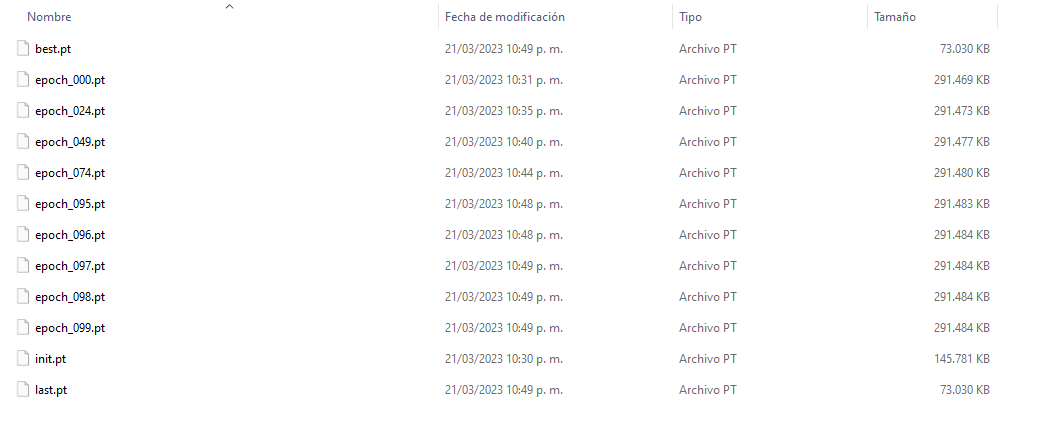

## 4. Uso del modelo
Para el uso del modelo use la siguiente estructura de comando.
python <archivo a correr> --weights <archivo de pesos> --conf <confianza del modelo> --img-size 640 --source 0 --view-img --no-trace
    
Un ejemplo seria:
    
python detect.py --weights yolo-hatsu-2.pt --conf 0.1 --img-size 640 --source 0 --view-img --no-trace
    
detect.py es el archivo de  detección por defecto de yolov7, usted puede editar este archivo segun desee, pero se recomienda crear una copia y editar esta


In [ ]:
python <archivo a correr> --weights <archivo de pesos> --conf <confianza del modelo> --img-size 640 --source 0 --view-img --no-trace

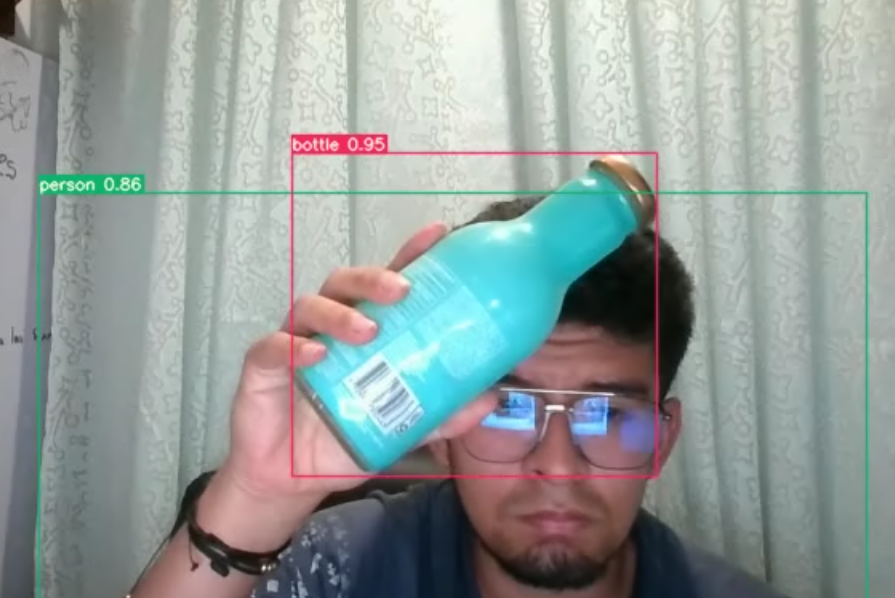

## 5. Complemento del modelo con robotflow

Roblow es una libreria desarrollada para analisis de imagenes que cuenta con varias funcionalidades para extraer información de estas, una de estas de denomina line Counter. Este modulo permite generar una linea en la imagen y detectar objetos cuando su trayectoria es cruzada por la linea

## Links Importantes 
Guia de entrenamiento de un detector personalizado: https://www.youtube.com/watch?v=-QWxJ0j9EY8 

Repositorio de yolo v7: https://github.com/WongKinYiu/yolov7 

Implementación de linecounter https://www.youtube.com/watch?v=OS5qI9YBkfk